# Reinforcement Learning

## Taxi-v2 example

In [1]:
import numpy as np
import gym
import random
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

### Setting up the environment

In [2]:
env = gym.make("Taxi-v2")
env.render()

/home/riteshk/.local/lib/python3.5/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



### Defining action_size and state_size

In [3]:
action_size = env.action_space.n
print("Action size: ", action_size)

state_size = env.observation_space.n
print("State size: ", state_size)

Action size:  6
State size:  500


### Defining the qtable

In [4]:
qtable = np.zeros((state_size, action_size))
print(qtable.shape)

(500, 6)


### Hyperparameters

In [5]:
total_episodes = 50000     # Total episodes
total_test_episodes = 100  # Total test episodes
max_steps = 99             # Max steps per episode

learning_rates = [0.6, 0.7, 0.8, 0.9]
gamma = 0.618              # Discounting rate

#Exploration parameters
epsilon = 1.0              # Exploration rate
max_epsilon = 1.0          # Exploration probability at start
min_epsilon = 0.01         # Minimum exploration probability
decay_rate = 0.01          # Explnential decay rate for exploration prob

### Training using different learning_rates

Score over time: 8.86
Score over time: 8.42
Score over time: 7.96
Score over time: 8.29


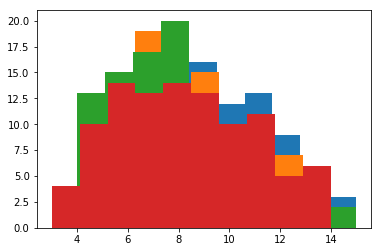

In [6]:
# Until learning is stopped
for learning_rate in learning_rates:
    for episode in range(total_episodes):
        # Reset the environment
        state = env.reset()
        step = 0
        done = False

        for stpe in range(max_steps):
            exp_exp_tradeoff = random.uniform(0, 1)

            if exp_exp_tradeoff > epsilon:
                action = np.argmax(qtable[state,:])
            else:
                action = env.action_space.sample()

            new_state, reward, done, info = env.step(action)
            qtable[state, action] = qtable[state, action] + learning_rate*(reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])
            state = new_state
            if done == True:
                break

        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*epsilon)

    env.reset()
    rewards = []
    for episode in range(total_test_episodes):
        state = env.reset()
        step = 0
        done = False
        total_rewards = 0
        for step in range(max_steps):
            action = np.argmax(qtable[state, :])
            new_state, reward, done, info = env.step(action)
            total_rewards += reward

            if done:
                rewards.append(total_rewards)
                break
            state = new_state
    env.close()
    print("Score over time: " + str(sum(rewards)/total_test_episodes))
    plt.hist(rewards)

### Displaying the game learned

In [7]:
env.reset()
rewards = []
for episode in range(total_test_episodes):
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    print("EPISODE ", episode)
    for step in range(max_steps):
        clear_output(wait=True)
        env.render()
        action = np.argmax(qtable[state, :])
        new_state, reward, done, info = env.step(action)
        print(info)
        total_rewards += reward
        
        if done:
            rewards.append(total_rewards)
            print("Score: ", total_rewards)
            break
        state = new_state
env.close()
print("Score over time: " + str(sum(rewards)/total_test_episodes))

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
{'prob': 1.0}
Score:  6
Score over time: 8.61
